# this notebook produces matrices showing the correlations among fmri conditions and behavioral clusters

Written by Angela Tam & CBIG under MIT license: https://github.com/ThomasYeoLab/CBIG/blob/master/LICENSE.md

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats
import scipy.cluster.hierarchy as sch
import os

### SET OUTPUT DIRECTORY

In [2]:
# set output directory, default is None - no output will be saved unless changed
path_out = None

### set variables

In [3]:
# input directory
in_dir = os.getenv('CBIG_REPDATA_DIR') + '/stable_projects/predict_phenotypes/ChenTam2021_TRBPC/figures'

## data driven clusters

In [4]:
# load data
# this .mat file is an output from ../matrix_plots/CBIG_TRBPC_plot_avg_relevance.m
mat_fc = sio.loadmat(in_dir + '/datadriven/mean_vec_clus_fmri.mat')

In [5]:
mat_fc['vec_stacked'].shape

(87571, 12)

In [6]:
# rearrange the matrix so that the order is rest, MID, SST, Nback
mat_r = np.zeros((87571, 12))
mat_r = np.copy(mat_fc['vec_stacked'])
mat_r[:,2] = mat_fc['vec_stacked'][:,3]
mat_r[:,3] = mat_fc['vec_stacked'][:,2]
mat_r[:,6] = mat_fc['vec_stacked'][:,7]
mat_r[:,7] = mat_fc['vec_stacked'][:,6]
mat_r[:,10] = mat_fc['vec_stacked'][:,11]
mat_r[:,11] = mat_fc['vec_stacked'][:,10]

In [7]:
# list of conditions
list_col = [
    'Cognitive REST',
    'Cognitive MID',
    'Cognitive SST',
    'Cognitive NBACK',
    'Personality REST',
    'Personality MID',
    'Personality SST',
    'Personality NBACK',
    'Mental health REST',
    'Mental health MID',
    'Mental health SST',
    'Mental health NBACK']

In [8]:
# build data frame and calculate correlations
df_corr_clus = pd.DataFrame(data=mat_r,columns=list_col)
df_corr_clus = df_corr_clus.corr()

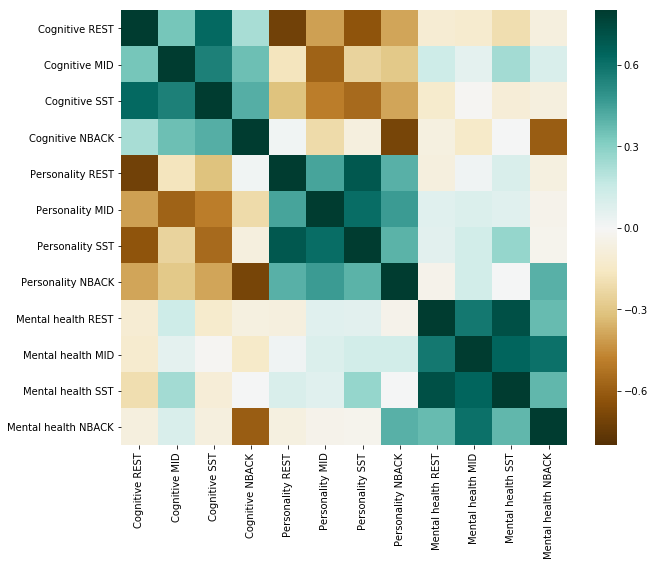

In [9]:
# plot correlations
plt.figure(figsize=(10,8))
g = sns.heatmap(df_corr_clus, vmin=-0.8, vmax=0.8, cmap="BrBG",
        xticklabels=df_corr_clus.columns,
        yticklabels=df_corr_clus.columns)
if isinstance(path_out, str):
    plt.savefig(path_out + '/datadriven_behav_fmri_sim_matrix.pdf')

## hypothesis driven clusters

In [10]:
# load data
# this .mat file is an output from ../matrix_plots/CBIG_TRBPC_plot_avg_relevance.m
mat_fc = sio.loadmat(in_dir + '/hypothesis/mean_vec_clus_fmri.mat')

In [11]:
mat_fc['vec_stacked'].shape

(87571, 12)

In [12]:
# rearrange the matrix so that the order is rest, MID, SST, Nback
mat_r = np.zeros((87571, 12))
mat_r = np.copy(mat_fc['vec_stacked'])
mat_r[:,2] = mat_fc['vec_stacked'][:,3]
mat_r[:,3] = mat_fc['vec_stacked'][:,2]
mat_r[:,6] = mat_fc['vec_stacked'][:,7]
mat_r[:,7] = mat_fc['vec_stacked'][:,6]
mat_r[:,10] = mat_fc['vec_stacked'][:,11]
mat_r[:,11] = mat_fc['vec_stacked'][:,10]

In [13]:
# buid data frame and calculate correlations
df_corr_clus = pd.DataFrame(data=mat_r,columns=list_col)
df_corr_clus = df_corr_clus.corr()

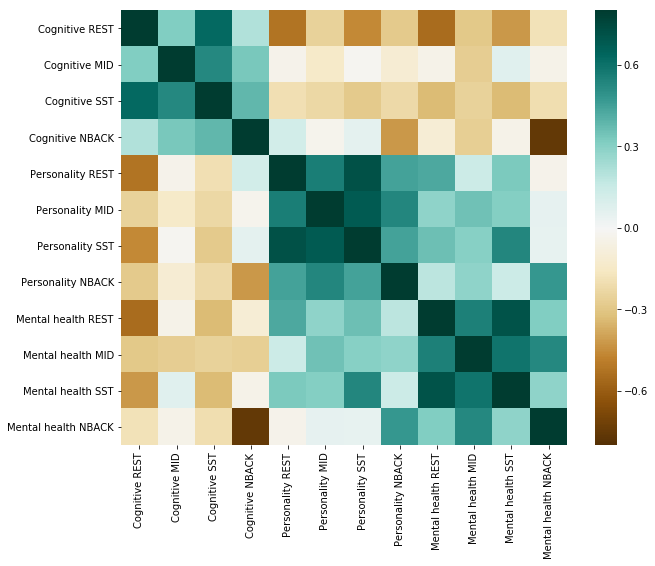

In [14]:
# plot
plt.figure(figsize=(10,8))
g = sns.heatmap(df_corr_clus, vmin=-0.8, vmax=0.8, cmap="BrBG",
        xticklabels=df_corr_clus.columns,
        yticklabels=df_corr_clus.columns)
if isinstance(path_out, str):
    plt.savefig(path_out + '/hypothesis_behav_fmri_sim_matrix.pdf')